# **Análisis y Reporte sobre el desempeño del modelo**
### Módulo 2: Machine Learning
*Adrián Emmanuel Faz Mercado A01570770*

**Dataset**: iris.csv

**Liga al dataset**: https://www.kaggle.com/datasets/uciml/iris

**Descripción del dataset**: El dataset de "iris.csv" contiene información y registros de diferentes características de tres especies de Iris recogidas por el botánico Edgar Anderson. Existen 150 registros, y cada registro tiene las siguientes características:
* Petal_Length
* Petal_Width
* Sepal_Length
* Sepal_Width

**Problema a resolver**: El problema presentado se trata de **clasificación**, pues lo que se busca es crear un modelo que permita clasificar una muestra en base a sus características como longitud de los pétalos, anchura de los pétalos, entre otros. Se trata de clasificación porque se busca que el modelo sea capaz de clasificar a cuál de las 3 posibles clases pertenece una muestra de iris.


En este caso, nos enfocaremos en el análisis del desempeño del modelo, analizaremos los niveles de sesgo, bias y ajuste del modelo para poder evaluarlo y realizar mejoras si es que son necesarias.

Importamos las librerías necesarias

In [599]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Cargamos los datos y asignamos nuestras variables de X y Y.

In [600]:
data = pd.read_csv("iris.csv")
# Se elimina el Id, para que no afecte en el modelo.
data = data.drop(['Id'], axis = 1)

# Le asignamos "Species" a Y porque es nuestra variable de salida, la que queremos predecir.
Y = data["Species"]

# Asignamos las demás columnas como la variable X, pues nos ayudarán con el entrenamiento.
X = data.drop(['Species'], axis = 1)

Realizamos la separación de los datos en:
* Entrenamiento (X_train, y_train) - 96 datos
* Validación (X_val, y_val) - 24 datos
* Pruebas (X_test, y_test) - 30 datos


El 80% de los datos serán destinados a entrenamiento (se descompone en 2 grupos más), mientras que el 20% serán destinados a pruebas. De ese 80% que se destinó a entrenamiento, el 20% será utilizado para validar el modelo y para elegir los mejores hiperparámetros, mientras que el otro 80% será directamente para entrenamiento.



In [601]:
# Dividimos los datos en datos de entrenamiento y datos de testeo.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Luego, dividimos los datos de entrenamiento en datos de entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

Ahora que ya tenemos nuestros datos separados en entrenamiento, validación y prueba, vamos a entrenar diferentes Árboles de Decisión con diferentes hiperparámetros. Se utilizarán los datos de validación para elegir cuál es el que tiene la mejor combinación de hiperparámetros, y el elegido será el que analizaremos a mayor profundidad.

### **Árbol 1**

Para este primera prueba de árbol, vamos a probar modificando 3 hiperparámetros:
* splitter: random
* criterion: entropy
* min_samples_leaf : 25

Accuracy validación: 66.66666666666666%
Accuracy entrenamiento: 69.79166666666666%


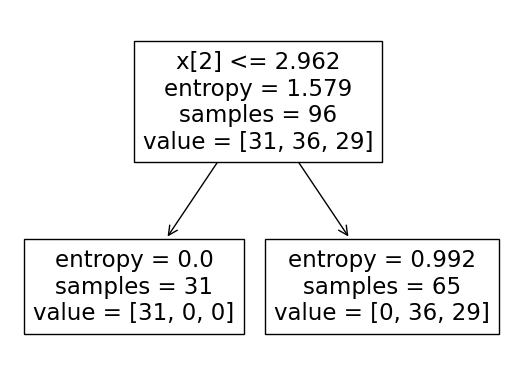

In [602]:
# Creamos nuestro objeto de Árbol de Decisión.
myTree = DecisionTreeClassifier(splitter="random",criterion="entropy", min_samples_leaf=25)
myTree.fit(X_train,y_train)
plot_tree(myTree)

# Predecimos los datos de validación utilizando el modelo creado.
y_val_pred = myTree.predict(X_val)
# Obtenemos la accuracy de los datos de validación.
val_accuracy = accuracy_score(y_val, y_val_pred)*100

# Predecimos los datos de entrenamiento utilizando el modelo creado.
y_train_pred = myTree.predict(X_train)
# Obtenemos el accuracy de los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy validación: {val_accuracy}%")
print(f"Accuracy entrenamiento: {train_accuracy}%")

Los resultados de desempeño en este primer árbol no son muy consistentes, pues cada vez que se corre hay un desempeño diferente tanto en la accuracy de validación como en la de entrenamiento. Este porcentaje puede variar desde 57% hasta 96%, y esto nos indica que no es muy estable.

En la primera prueba, el porcentaje de accuracy de validación fue de 75%, y el de entrenamiento de 62.5%

### **Árbol 2**

Para esta segunda prueba, probaremos eliminando los hiperparámetros de splitter y min_samples_leaf, y se agregará el hiperparámetro de max_features.
Se probará ahora con estos hiperparámetros:
* criterion: entropy
* max_features: 2

Accuracy validación: 95.83333333333334%
Accuracy entrenamiento: 100.0%


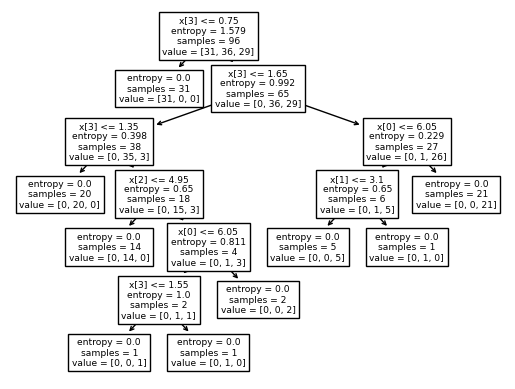

In [603]:
# Creamos nuestro objeto de Árbol de Decisión.
myTree2 = DecisionTreeClassifier(criterion="entropy",max_features=2)
myTree2.fit(X_train,y_train)

plot_tree(myTree2)

# Predecimos los datos de validación utilizando el modelo creado.
y_val_pred = myTree2.predict(X_val)
# Obtenemos la accuracy de los datos de validación.
val_accuracy = accuracy_score(y_val, y_val_pred)*100

# Predecimos los datos de entrenamiento utilizando el modelo creado.
y_train_pred = myTree2.predict(X_train)
# Obtenemos el accuracy de los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy validación: {val_accuracy}%")
print(f"Accuracy entrenamiento: {train_accuracy}%")

En este nuevo árbol, podemos ver que los resultados de desempeño son consistentes en todas las pruebas que se realizan. El accuracy del set de validación es de 95.83%, mientras que el de entrenamiento es del 100%.

El desempeño de este árbol es mucho mejor pues tiene porcentajes altos y la diferencia entre los porcentajes de entrenamiento y validación no es mucha.

### **Árbol 3**

Para la tercer prueba de árbol, se mantendrá el parámetro de "max_features", pero se modificará su valor a 1, para ver cómo cambia. Además, se agregará el hiperparámetro de "max_depth". Se probará con estos hiperparámetros:
* Criterion: entropy
* max_depth: 2
* max_features: 1

Accuracy validación: 83.33333333333334%
Accuracy entrenamiento: 81.25%


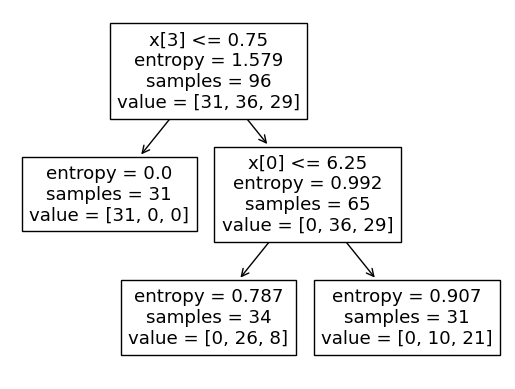

In [604]:
# Creamos nuestro objeto de Árbol de Decisión.
myTree3 = DecisionTreeClassifier(criterion="entropy",max_depth=2, max_features=1)
myTree3.fit(X_train,y_train)

plot_tree(myTree3)

# Predecimos los datos de validación utilizando el modelo creado.
y_val_pred = myTree3.predict(X_val)
# Obtenemos la accuracy de los datos de validación.
val_accuracy = accuracy_score(y_val, y_val_pred)*100

# Predecimos los datos de entrenamiento utilizando el modelo creado.
y_train_pred = myTree3.predict(X_train)
# Obtenemos el accuracy de los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy validación: {val_accuracy}%")
print(f"Accuracy entrenamiento: {train_accuracy}%")

Si bien en la mayoría de las pruebas con este árbol, el desempeño fue entre 85 y 95% de accuracy, habían casos en donde el desempeño caía a 65%.  

En este caso, la primera vez que se corrió este modelo y se calculó el desempeño, la accuracy de validación fue de 83.33%, mientras que la accuracy de entrenamiento fue de 81.25%.

Sin embargo, en otras pruebas se obtuvieron resultados de 95%, pero también de 65%.

## **Selección de Modelo e hiperparámetros**
Después de haber probado con diferentes hiperparámetros, el modelo que se seleccionará para seguir analizando y modificando es el del **Árbol 2**, con los parámetros de:

* criterion: entropy
* max_features: 2

Se seleccionó este modelo porque fue el que tuvo el mejor desempeño en cuestión de los datos de validación y entrenamiento, comparando los resultados predecidos por el modelo y los resultados reales.

El desempeño del modelo fue constante aunque se intentó correr varias veces, y el accuracy del modelo era el siguiente:
* Validación: 95.83%
* Entrenamiento: 100.0%

El modelo elegido para analizar se renombrará a "myTree".  

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.75\nentropy = 1.579\nsamples = 96\nvalue = [31, 36, 29]'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.95\nentropy = 0.992\nsamples = 65\nvalue = [0, 36, 29]'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.65\nentropy = 0.398\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.0\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[3] <= 1.7\nentropy = 0.229\nsamples = 27\nvalue = [0, 1, 26]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 2.65\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.25, 'x[1] <= 2.85\nentropy = 1.0\nsamples = 2\nvalue = [0

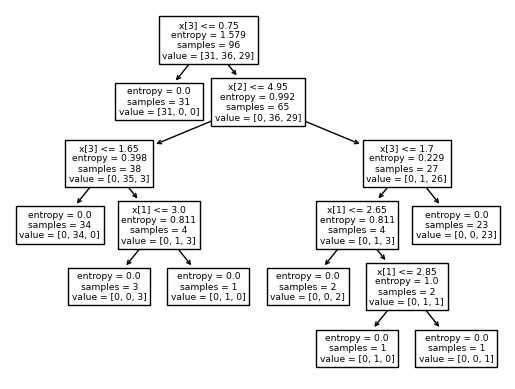

In [605]:
# Creamos nuestro objeto de Árbol de Decisión definitivo
myTree = DecisionTreeClassifier(criterion="entropy",max_features=2)
myTree.fit(X_train,y_train)

plot_tree(myTree)


Ahora, analizaremos algunos datos importantes del desempeño del modelo obtenido.

###**Bias ó Sesgo**

Para analizar si existe algún sesgo en nuestro set de datos, comenzaremos revisando el subset de entrenamiento que se utilizó. Utilizaremos el método de describe() para analizar datos importantes las columnas utilizadas para entrenar el modelo.

In [606]:
print(X_train.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      96.000000     96.000000      96.000000     96.000000
mean        5.811458      3.014583       3.729167      1.161458
std         0.838905      0.436970       1.738960      0.727558
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.700000       1.500000      0.300000
50%         5.700000      3.000000       4.200000      1.300000
75%         6.400000      3.300000       5.025000      1.800000
max         7.900000      4.100000       6.700000      2.500000


En la tabla anterior, se puede observar que por lo menos, en la parte de count, **todos los registros están completos**, no hay ningún registro que no cuente con algún dato de de las columnas. Los 96 datos tienen todos los valores de las columnas completos, y eso es un buen indicador de que no exista algún sesgo hacia alguna columna en específico que podría tener una mayor cantidad de datos.

Ahora, se analizarán cuantos registros hay de cada clase resultante, para así analizar si no existe algún sesgo en cuestión de que exista una clase que esté entrenada de más y que quizás el modelo tienda a asignar esa clase a la mayoría de las pruebas.   

In [607]:
print(y_train.value_counts())

Iris-versicolor    36
Iris-setosa        31
Iris-virginica     29
Name: Species, dtype: int64


En la tabla anterior, podemos ver que las clases no están balanceadas completamente, y hay una mayor cantidad de registros de Iris-versicolor. Sin embargo, en realidad **la diferencia entre cantidad de clases no es tan drástica**, y hay una buena cantidad de registros de cada clase como para entrenar correctamente al modelo en todas ellas.  

Además, para analizar el sesgo en el modelo podemos tomar como base el resultado del desempeño de entrenamiento, el cual fue muy bueno, pues fue de 100%. Este resultado y los análisis anteriores nos permiten afirmar que el modelo cuenta con un **sesgo o bias bajo**. Esto nos indica que el modelo ha logrado aprender correctamente las características involucradas en los datos de entrenamiento.

###**Varianza**



Para analizar la varianza de nuestro modelo, vamos a realizar una gráfica de la curva de aprendizaje de nuestro modelo, donde se refleje de qué manera va incrementando la "accuracy" del modelo en base a la cantidad de datos que se ingresan.

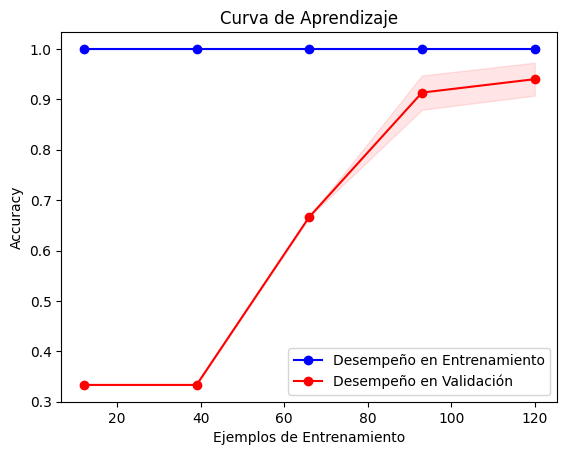

In [608]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Ejemplos de Entrenamiento")
    plt.ylabel("Accuracy")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='r')

    plt.plot(train_sizes, train_mean, 'o-', color='b', label="Desempeño en Entrenamiento")
    plt.plot(train_sizes, val_mean, 'o-', color='r', label="Desempeño en Validación")

    plt.legend(loc='best')

    plt.show()

plot_learning_curve(myTree, X, Y)


En la gráfica anterior, podemos observar varias cosas. Primero, se puede ver que la línea de entrenamiento se mantiene en 1.0 de accuracy desde el inicio, mientras que en cuestión de los datos de validación, la línea va creciendo conforme van creciendo los datos, hasta que llega a un valor estable entre 0.9 y 0.95, donde llega a converger junto con la línea de entretenimiento. Se puede observar que si bien no llegan exactamente a la misma puntuación, en realidad estos se encuentran muy cerca.

Esto nos indica que contamos con un **nivel de varianza bajo**, pues la diferencia en el desempeño de ambos sets de datos al llegar a la misma cantidad de ejemplos de entrenamiento es pequeña. El rendimiento similar que tenemos entre los datos de validación y de entrenamiento es también un buen indicador de que nuestro nivel de varianza es bajo.

###**Nivel de ajuste**

Después de analizar los criterios de sesgo y varianza, y de verificar el desempeño de los datos de entrenamiento y de validación, podemos llegar a la conclusión de que el modelo tiene un **buen fit**. Esto se debe a diferentes razones, primeramente, los datos de entrenamiento obtuvieron un accuracy del 100%, lo cual nos indica que el modelo ha podido aprender y capturar correctamente las características y relaciones proporcionadas.

Sin embargo, es importante también revisar el subset de validación que definimos al inicio, para analizar su comportamiento con datos que no ha visto. Afortunadamente el modelo logró tener un accuracy de 95.83% en los datos de validación, lo que indica también que el modelo ha podido generalizar bien y no solo se ha adaptado a las características específicas del conjunto de entrenamiento.

De igual forma, la diferencia entre la accuracy del entrenamiento y la validación es mínima (4.17%). Esto nos nuevamente nos dice que el modelo tiene una varianza relativamente baja y que es robusto a las variaciones en los datos.

Por estas razones, podemos afirmar que el modelo tiene un **buen ajuste** y no sufre de overfitting o de underfitting.

### **Técnica de regularización.**

Ahora, antes de probar el modelo con los datos de prueba, aplicaremos una técnica de regularización a nuestro modelo, la cual busca penalizar el peso de los parámetros de nuestro modelo.

Para los Árboles de Decisión, una técnica que se utiliza para regularizar es el uso del parámetro de "ccp_alpha", que forma parte de la estrategia de poda de complejidad de coste. En esencia, este parámetro penaliza la complejidad del árbol, donde valores más altos de "ccp_alpha" resultan en árboles más pequeños y simplificados.

Normalmente, se utiliza el método de "cost_complexity_pruning_path", para encontrar los posibles valores de alpha que nos permiten encontrar el mejor modelo. Sin embargo, en este caso, Google Colab no permite utilizar el método, por lo que simplemente se probarán 3 valores de ccp_alpha seleccionados manualmente, buscando encontrar el que nos dé mejores resultados.

Los valores con los que probaremos serán 0.01, 0.02, 0.05

#### ccp_alpha de 0.01

In [609]:
myTree = DecisionTreeClassifier(criterion="entropy",max_features=2, ccp_alpha=0.01)
myTree.fit(X_train,y_train)

# Predecimos los datos de validación utilizando el modelo creado.
y_val_pred = myTree.predict(X_val)
# Obtenemos la accuracy de los datos de validación.
val_accuracy = accuracy_score(y_val, y_val_pred)*100

# Predecimos los datos de entrenamiento utilizando el modelo creado.
y_train_pred = myTree.predict(X_train)
# Obtenemos el accuracy de los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy validación: {val_accuracy}%")
print(f"Accuracy entrenamiento: {train_accuracy}%")


Accuracy validación: 95.83333333333334%
Accuracy entrenamiento: 100.0%


#### ccp_alpha de 0.02

In [610]:
myTree = DecisionTreeClassifier(criterion="entropy",max_features=2, ccp_alpha=0.02)
myTree.fit(X_train,y_train)

# Predecimos los datos de validación utilizando el modelo creado.
y_val_pred = myTree.predict(X_val)
# Obtenemos la accuracy de los datos de validación.
val_accuracy = accuracy_score(y_val, y_val_pred)*100

# Predecimos los datos de entrenamiento utilizando el modelo creado.
y_train_pred = myTree.predict(X_train)
# Obtenemos el accuracy de los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy validación: {val_accuracy}%")
print(f"Accuracy entrenamiento: {train_accuracy}%")

Accuracy validación: 95.83333333333334%
Accuracy entrenamiento: 98.95833333333334%


#### ccp_alpha de 0.05

In [611]:
myTree = DecisionTreeClassifier(criterion="entropy",max_features=2, ccp_alpha=0.05)
myTree.fit(X_train,y_train)

# Predecimos los datos de validación utilizando el modelo creado.
y_val_pred = myTree.predict(X_val)
# Obtenemos la accuracy de los datos de validación.
val_accuracy = accuracy_score(y_val, y_val_pred)*100

# Predecimos los datos de entrenamiento utilizando el modelo creado.
y_train_pred = myTree.predict(X_train)
# Obtenemos el accuracy de los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy validación: {val_accuracy}%")
print(f"Accuracy entrenamiento: {train_accuracy}%")

Accuracy validación: 95.83333333333334%
Accuracy entrenamiento: 95.83333333333334%


Después de analizar los resultados probando los 3 valores de ccp_alpha que definimos, podemos darnos cuenta que los 3 igualmente tienen muy buenos resultados. Cualquiera de ellos representa un buen fit, porque la diferencia entre el conjunto de validación y entrenamiento es muy pequeña y porque tienen porcentajes altos de desempeño en accuracy.

Seleccionaremos el valor de ccp_alpha de 0.05, porque es el que nos dio una menor diferencia entre el conjunto de validación y el de entrenamiento, pero en realidad cualquiera de los demás podrían funcionar porque la diferencia es mínima y también tienen excelente desempeño.

El modelo final, incluyendo la parte de regularización es el siguiente:

[Text(0.4, 0.875, 'x[2] <= 2.35\nentropy = 1.579\nsamples = 96\nvalue = [31, 36, 29]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.625, 'x[2] <= 4.95\nentropy = 0.992\nsamples = 65\nvalue = [0, 36, 29]'),
 Text(0.4, 0.375, 'x[3] <= 1.65\nentropy = 0.398\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.6, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.8, 0.375, 'entropy = 0.229\nsamples = 27\nvalue = [0, 1, 26]')]

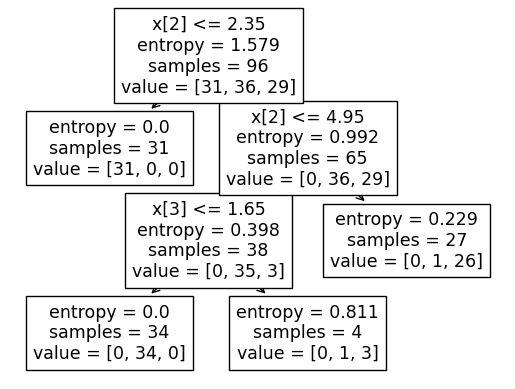

In [612]:
myTree = DecisionTreeClassifier(criterion="entropy",max_features=2, ccp_alpha=0.05)
myTree.fit(X_train,y_train)

plot_tree(myTree)

### **Modelo con Datos de Prueba**

Finalmente, vamos a probar nuestro modelo con los datos que definimos inicialmente como de prueba y que el modelo no ha visto.



In [613]:
# Predecimos los datos de validación utilizando el modelo creado.
y_test_pred = myTree.predict(X_test)
# Obtenemos la accuracy de los datos de validación.
test_accuracy = accuracy_score(y_test, y_test_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy testing: {test_accuracy}%")

Accuracy testing: 100.0%


Podemos observar que nuestros datos de prueba tienen un desempeño del **93.33% de accuracy**, el cual es un porcentaje muy bueno y nos permite confirmar que tenemos un modelo que se puede desempeñar adecuadamente en datos generales.